<a href="https://colab.research.google.com/github/ertgrulyksk/UK-Traffic-Accidents/blob/main/UK_Traffic_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ilk = pd.read_csv('accidents_2005_to_2007.csv',low_memory=False)
iki = pd.read_csv('accidents_2009_to_2011.csv',low_memory=False)
uc = pd.read_csv('accidents_2012_to_2014.csv',low_memory=False)
kazalar = pd.concat([ilk, iki, uc], axis = 0)

In [3]:
kazalar.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,1,3,2,1,11/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Ol or diesel,None,1,Yes,E01002832,2005
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,3,1,2,14/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002889,2005
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002900,2005
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,...,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005


In [4]:
kazalar.shape

(1504150, 33)

In [5]:
kazalar.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [6]:
kazalar.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [7]:
kazalar = kazalar.loc[:,["Accident_Severity","Number_of_Casualties","Day_of_Week","Date","Time","Local_Authority_(District)"
                         ,"Local_Authority_(Highway)","Road_Type","Speed_limit","Light_Conditions","Weather_Conditions",
                        "Road_Surface_Conditions","Year"]]

In [8]:
kazalar.tail(10)

,Accident_Severity,Number_of_Casualties,Day_of_Week,Date,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year
464687,3,1,2,24/11/2014,06:50,917,S12000006,Dual carriageway,70,Darkeness: No street lighting,Fine without high winds,Wet/Damp,2014
464688,1,3,3,25/11/2014,15:30,917,S12000006,Single carriageway,60,Daylight: Street light present,Fine without high winds,Wet/Damp,2014
464689,3,1,4,03/12/2014,19:30,917,S12000006,Single carriageway,60,Darkeness: No street lighting,Fog or mist,Wet/Damp,2014
464690,3,1,7,06/12/2014,03:00,917,S12000006,Single carriageway,40,Darkeness: No street lighting,Other,Wet/Damp,2014
464691,3,1,2,08/12/2014,09:16,917,S12000006,Dual carriageway,70,Daylight: Street light present,Fine without high winds,Snow,2014
464692,2,1,1,07/12/2014,22:20,917,S12000006,Dual carriageway,70,Darkeness: No street lighting,Snowing without high winds,Snow,2014
464693,3,2,5,11/12/2014,06:40,917,S12000006,Dual carriageway,70,Darkeness: No street lighting,Fine without high winds,Snow,2014
464694,3,1,3,09/12/2014,02:00,917,S12000006,Single carriageway,40,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2014
464695,2,2,4,17/12/2014,06:55,917,S12000006,Single carriageway,60,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2014
464696,3,2,4,24/12/2014,15:00,917,S12000006,Single carriageway,60,Daylight: Street light present,Fine without high winds,Wet/Damp,2014


In [9]:
kazalar.isnull().sum()

Accident_Severity                0
Number_of_Casualties             0
Day_of_Week                      0
Date                             0
Time                           117
Local_Authority_(District)       0
Local_Authority_(Highway)        0
Road_Type                        0
Speed_limit                      0
Light_Conditions                 0
Weather_Conditions             126
Road_Surface_Conditions       1958
Year                             0
dtype: int64

In [10]:
kazalar.shape

(1504150, 13)

In [11]:
kazalar = kazalar.dropna()
kazalar.shape

(1501957, 13)

In [12]:
kazalar.isnull().sum()

Accident_Severity             0
Number_of_Casualties          0
Day_of_Week                   0
Date                          0
Time                          0
Local_Authority_(District)    0
Local_Authority_(Highway)     0
Road_Type                     0
Speed_limit                   0
Light_Conditions              0
Weather_Conditions            0
Road_Surface_Conditions       0
Year                          0
dtype: int64

In [13]:
kazalar.dtypes

Accident_Severity              int64
Number_of_Casualties           int64
Day_of_Week                    int64
Date                          object
Time                          object
Local_Authority_(District)     int64
Local_Authority_(Highway)     object
Road_Type                     object
Speed_limit                    int64
Light_Conditions              object
Weather_Conditions            object
Road_Surface_Conditions       object
Year                           int64
dtype: object

In [14]:
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
selRows = kazalar[kazalar['Time'].isna()].index
kazalar = kazalar.drop(selRows, axis = 0)
kazalar['Time'] = pd.to_datetime(kazalar["Time"], format='%H:%M')
kazalar["Hour"] = kazalar["Time"].dt.hour
kazalar["Month"] = pd.DatetimeIndex(kazalar["Date"]).month

In [15]:
kazalar.dtypes

Accident_Severity                      int64
Number_of_Casualties                   int64
Day_of_Week                            int64
Date                                  object
Time                          datetime64[ns]
Local_Authority_(District)             int64
Local_Authority_(Highway)             object
Road_Type                             object
Speed_limit                            int64
Light_Conditions                      object
Weather_Conditions                    object
Road_Surface_Conditions               object
Year                                   int64
Hour                                   int64
Month                                  int64
dtype: object

In [16]:
kazalar.head(10)

,Accident_Severity,Number_of_Casualties,Day_of_Week,Date,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year,Hour,Month
0,2,1,3,04/01/2005,1900-01-01 17:42:00,12,E09000020,Single carriageway,30,Daylight: Street light present,Raining without high winds,Wet/Damp,2005,17,4
1,3,1,4,05/01/2005,1900-01-01 17:36:00,12,E09000020,Dual carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,2005,17,5
2,3,1,5,06/01/2005,1900-01-01 00:15:00,12,E09000020,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,2005,0,6
3,3,1,6,07/01/2005,1900-01-01 10:35:00,12,E09000020,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,2005,10,7
4,3,1,2,10/01/2005,1900-01-01 21:13:00,12,E09000020,Single carriageway,30,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,2005,21,10
5,3,1,3,11/01/2005,1900-01-01 12:40:00,12,E09000020,Single carriageway,30,Daylight: Street light present,Raining without high winds,Wet/Damp,2005,12,11
6,3,1,5,13/01/2005,1900-01-01 20:40:00,12,E09000020,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,2005,20,1
7,3,2,6,14/01/2005,1900-01-01 17:35:00,12,E09000020,Dual carriageway,30,Daylight: Street light present,Fine without high winds,Dry,2005,17,1
8,3,2,7,15/01/2005,1900-01-01 22:43:00,12,E09000020,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,2005,22,1
9,3,5,7,15/01/2005,1900-01-01 16:00:00,12,E09000020,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,2005,16,1


In [17]:
kazalar["Year"].unique()

array([2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014])

In [18]:
kazalar.Year = kazalar.Year.astype(str)
kaza_sayisi = kazalar.groupby("Year")

In [20]:
toplam_kaza_sayisi = pd.DataFrame(kaza_sayisi.size().sort_values(ascending=False), columns=["Sayı"])

In [21]:
toplam_kaza_sayisi.head()

,Sayı
Year,
2005,198474
2006,188913
2007,181881
2012,179436
2009,163334


Text(0.5, 1.0, 'Yıllara göre kaza sayısı')

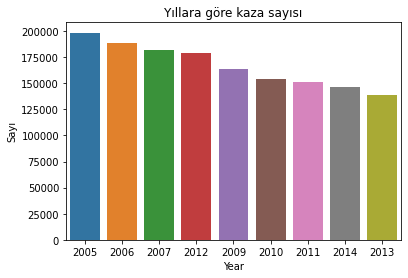

In [22]:
sns.barplot(y = toplam_kaza_sayisi["Sayı"], x = toplam_kaza_sayisi.index)
plt.title("Yıllara göre kaza sayısı")

In [23]:
kazalar["Light_Conditions"].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'], dtype=object)

In [24]:
kazalar.dtypes

Accident_Severity                      int64
Number_of_Casualties                   int64
Day_of_Week                            int64
Date                                  object
Time                          datetime64[ns]
Local_Authority_(District)             int64
Local_Authority_(Highway)             object
Road_Type                             object
Speed_limit                            int64
Light_Conditions                      object
Weather_Conditions                    object
Road_Surface_Conditions               object
Year                                  object
Hour                                   int64
Month                                  int64
dtype: object

In [25]:
kazalar.Hour = kazalar.Hour.astype(str)
kazalar.Month = kazalar.Month.astype(str)

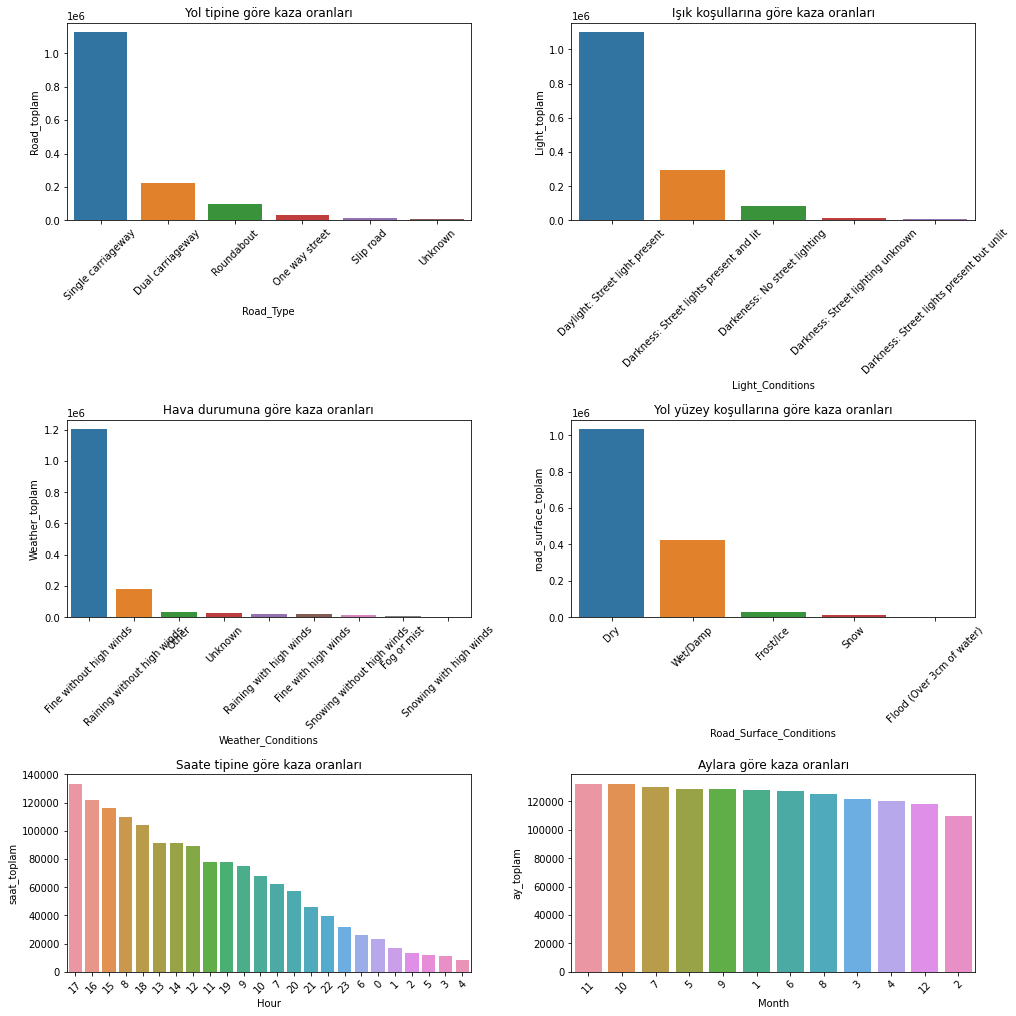

In [26]:
f, axs = plt.subplots(3, 2, figsize = (14, 14), constrained_layout = True)

road_sayisi = kazalar.groupby("Road_Type")
toplam_road = pd.DataFrame(road_sayisi.size().sort_values(ascending=False),columns=["Road_toplam"])

light_sayisi = kazalar.groupby("Light_Conditions")
toplam_light = pd.DataFrame(light_sayisi.size().sort_values(ascending=False),columns=["Light_toplam"])

weather_sayisi = kazalar.groupby("Weather_Conditions")
toplam_weather = pd.DataFrame(weather_sayisi.size().sort_values(ascending=False),columns=["Weather_toplam"])

surface_sayisi = kazalar.groupby("Road_Surface_Conditions")
toplam_surface = pd.DataFrame(surface_sayisi.size().sort_values(ascending=False),columns=["road_surface_toplam"])

saat_sayisi = kazalar.groupby("Hour")
toplam_saat = pd.DataFrame(saat_sayisi.size().sort_values(ascending=False),columns=["saat_toplam"])

ay_sayisi = kazalar.groupby("Month")
toplam_ay = pd.DataFrame(ay_sayisi.size().sort_values(ascending=False),columns=["ay_toplam"])

ax = sns.barplot(x=toplam_road.index, y=toplam_road["Road_toplam"], data=toplam_road, ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax = sns.barplot(x=toplam_light.index, y=toplam_light["Light_toplam"], data=toplam_light, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax = sns.barplot(x=toplam_weather.index, y=toplam_weather["Weather_toplam"], data=toplam_weather, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax = sns.barplot(x=toplam_surface.index, y=toplam_surface["road_surface_toplam"], data=toplam_surface, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax = sns.barplot(x=toplam_saat.index, y=toplam_saat["saat_toplam"], data=toplam_saat, ax = axs[2, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax = sns.barplot(x=toplam_ay.index, y=toplam_ay["ay_toplam"], data=toplam_ay, ax = axs[2, 1])
ax.tick_params(axis = 'x', rotation = 45)

axs[0, 0].title.set_text('Yol tipine göre kaza oranları')
axs[0, 1].title.set_text('Işık koşullarına göre kaza oranları')
axs[1, 0].title.set_text('Hava durumuna göre kaza oranları')
axs[1, 1].title.set_text('Yol yüzey koşullarına göre kaza oranları')
axs[2, 0].title.set_text('Saate tipine göre kaza oranları')
axs[2, 1].title.set_text('Aylara göre kaza oranları')

In [27]:
kazalar.dtypes

Accident_Severity                      int64
Number_of_Casualties                   int64
Day_of_Week                            int64
Date                                  object
Time                          datetime64[ns]
Local_Authority_(District)             int64
Local_Authority_(Highway)             object
Road_Type                             object
Speed_limit                            int64
Light_Conditions                      object
Weather_Conditions                    object
Road_Surface_Conditions               object
Year                                  object
Hour                                  object
Month                                 object
dtype: object

Text(0.5, 1.0, 'Hıza göre kaza sayısı')

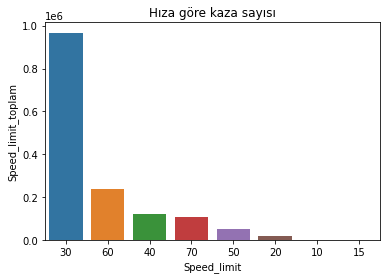

In [29]:
kazalar.Speed_limit = kazalar.Speed_limit.astype(str)
speed_sayisi = kazalar.groupby("Speed_limit")
toplam_speed = pd.DataFrame(speed_sayisi.size().sort_values(ascending=False), columns=["Speed_limit_toplam"])
sns.barplot(y = toplam_speed["Speed_limit_toplam"], x = toplam_speed.index)
plt.title("Hıza göre kaza sayısı")

In [30]:
kazalar["Number_of_Casualties"].unique()

array([ 1,  2,  5,  4,  3,  8,  7,  6, 10,  9, 23, 17, 13, 11, 19, 15, 16,
       12, 14, 18, 20, 29, 21, 35, 22, 26, 45, 41, 36, 40, 25, 28, 42, 68,
       27, 48, 24, 43, 87, 63, 51, 33, 38, 46, 70, 93, 54])

In [31]:
kazalar.columns

Index(['Accident_Severity', 'Number_of_Casualties', 'Day_of_Week', 'Date',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Road_Type', 'Speed_limit', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Year', 'Hour', 'Month'],
      dtype='object')

In [33]:
kazalar.Hour = kazalar.Hour.astype(int)

In [34]:
kazalar.dtypes

Accident_Severity                      int64
Number_of_Casualties                   int64
Day_of_Week                            int64
Date                                  object
Time                          datetime64[ns]
Local_Authority_(District)             int64
Local_Authority_(Highway)             object
Road_Type                             object
Speed_limit                           object
Light_Conditions                      object
Weather_Conditions                    object
Road_Surface_Conditions               object
Year                                  object
Hour                                   int64
Month                                 object
dtype: object

In [35]:
df = pd.get_dummies(kazalar, columns=['Road_Type', 'Weather_Conditions', 'Light_Conditions', 'Road_Surface_Conditions',])

In [36]:
df.dtypes

Accident_Severity                                                      int64
Number_of_Casualties                                                   int64
Day_of_Week                                                            int64
Date                                                                  object
Time                                                          datetime64[ns]
Local_Authority_(District)                                             int64
Local_Authority_(Highway)                                             object
Speed_limit                                                           object
Year                                                                  object
Hour                                                                   int64
Month                                                                 object
Road_Type_Dual carriageway                                             uint8
Road_Type_One way street                                               uint8

In [38]:
df.Speed_limit = df.Speed_limit.astype(int)

In [39]:
yarali_sayisi = df["Number_of_Casualties"].values
kategori = []
for num in yarali_sayisi:
    if num == 1:
        kategori.append("1 yarali")
    elif num > 1 and num < 3:
        kategori.append("1 ile 3 arasi")
    elif num > 3 and num < 6:
        kategori.append("3 ile 6 arasi")
    elif num > 6 and num < 9:
        kategori.append("6 ile 9 arasi")
    elif num > 9 and num < 12:
        kategori.append("9 ile 12 arasi")  
    else:
        kategori.append("12'den cok")
kategori = pd.DataFrame(data=kategori, columns=["Kategori"])
df = df.reset_index(drop=True)
data = pd.concat([df, kategori], axis = 1)
data.drop(columns = "Number_of_Casualties", axis  = 1, inplace=True)

In [40]:
data.head(10)

,Accident_Severity,Day_of_Week,Date,Time,Local_Authority_(District),Local_Authority_(Highway),Speed_limit,Year,Hour,Month,...,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Kategori
0,2,3,04/01/2005,1900-01-01 17:42:00,12,E09000020,30,2005,17,4,...,0,0,0,1,0,0,0,0,1,1 yarali
1,3,4,05/01/2005,1900-01-01 17:36:00,12,E09000020,30,2005,17,5,...,0,1,0,0,1,0,0,0,0,1 yarali
2,3,5,06/01/2005,1900-01-01 00:15:00,12,E09000020,30,2005,0,6,...,0,1,0,0,1,0,0,0,0,1 yarali
3,3,6,07/01/2005,1900-01-01 10:35:00,12,E09000020,30,2005,10,7,...,0,0,0,1,1,0,0,0,0,1 yarali
4,3,2,10/01/2005,1900-01-01 21:13:00,12,E09000020,30,2005,21,10,...,1,0,0,0,0,0,0,0,1,1 yarali
5,3,3,11/01/2005,1900-01-01 12:40:00,12,E09000020,30,2005,12,11,...,0,0,0,1,0,0,0,0,1,1 yarali
6,3,5,13/01/2005,1900-01-01 20:40:00,12,E09000020,30,2005,20,1,...,0,1,0,0,1,0,0,0,0,1 yarali
7,3,6,14/01/2005,1900-01-01 17:35:00,12,E09000020,30,2005,17,1,...,0,0,0,1,1,0,0,0,0,1 ile 3 arasi
8,3,7,15/01/2005,1900-01-01 22:43:00,12,E09000020,30,2005,22,1,...,0,1,0,0,1,0,0,0,0,1 ile 3 arasi
9,3,7,15/01/2005,1900-01-01 16:00:00,12,E09000020,30,2005,16,1,...,0,0,0,1,1,0,0,0,0,3 ile 6 arasi


In [41]:
data['Kategori'].unique()

array(['1 yarali', '1 ile 3 arasi', '3 ile 6 arasi', "12'den cok",
       '6 ile 9 arasi', '9 ile 12 arasi'], dtype=object)

In [42]:
data.dtypes

Accident_Severity                                                      int64
Day_of_Week                                                            int64
Date                                                                  object
Time                                                          datetime64[ns]
Local_Authority_(District)                                             int64
Local_Authority_(Highway)                                             object
Speed_limit                                                            int64
Year                                                                  object
Hour                                                                   int64
Month                                                                 object
Road_Type_Dual carriageway                                             uint8
Road_Type_One way street                                               uint8
Road_Type_Roundabout                                                   uint8

In [43]:
data.drop(columns=["Month","Year","Local_Authority_(Highway)","Local_Authority_(District)","Time","Date"], axis = 1, inplace = True)

In [44]:
data.head(10)

,Accident_Severity,Day_of_Week,Speed_limit,Hour,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,...,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Kategori
0,2,3,30,17,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1 yarali
1,3,4,30,17,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1 yarali
2,3,5,30,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1 yarali
3,3,6,30,10,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1 yarali
4,3,2,30,21,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1 yarali
5,3,3,30,12,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1 yarali
6,3,5,30,20,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1 yarali
7,3,6,30,17,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1 ile 3 arasi
8,3,7,30,22,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1 ile 3 arasi
9,3,7,30,16,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,3 ile 6 arasi


In [45]:
data.columns

Index(['Accident_Severity', 'Day_of_Week', 'Speed_limit', 'Hour',
       'Road_Type_Dual carriageway', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Single carriageway',
       'Road_Type_Slip road', 'Road_Type_Unknown',
       'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present',
       'Road_Sur

In [46]:
len(data.columns)

30

In [47]:
a=data.columns[0:29]

In [48]:
a

Index(['Accident_Severity', 'Day_of_Week', 'Speed_limit', 'Hour',
       'Road_Type_Dual carriageway', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Single carriageway',
       'Road_Type_Slip road', 'Road_Type_Unknown',
       'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present',
       'Road_Sur

In [49]:
data.to_csv('sonhali.csv')

In [50]:
from sklearn.model_selection import train_test_split
col_isimler = a
tahmin_isimler = ['Kategori']
X = data[col_isimler].values

y = data[tahmin_isimler].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)

In [52]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(random_state=42)

In [54]:
prediction_from_trained_data = dt_model.predict(X_train)
accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)
print("Kara ağaçları ile eğitim başarısı : {0:.4f}".format(accuracy))

Kara ağaçları ile eğitim başarısı : 0.7788


In [57]:
dt_predict_test = dt_model.predict(X_test)

print(classification_report(y_test, dt_predict_test))
print("Kara Ağaçlarının test verisi üzerinde'ki performansı %s" % accuracy_score(y_test, dt_predict_test))

                precision    recall  f1-score   support

 1 ile 3 arasi       0.22      0.03      0.06     48157
      1 yarali       0.77      0.97      0.86    230544
    12'den cok       0.10      0.01      0.01     14475
 3 ile 6 arasi       0.07      0.01      0.01      6838
 6 ile 9 arasi       0.07      0.01      0.01       330
9 ile 12 arasi       0.50      0.02      0.04        48

      accuracy                           0.75    300392
     macro avg       0.29      0.17      0.17    300392
  weighted avg       0.63      0.75      0.67    300392

Kara Ağaçlarının test verisi üzerinde'ki performansı 0.753398892114304


In [58]:
print("Kara Ağaçları için Karışıklık matirsi")

print("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test, labels= ['6 ile 9 arasi',
 
 '9 ile 12 arasi',
 "1 yarali",
 "12'den cok",
 '1 ile 3 arasi',
 '3 ile 6 arasi'])))

print("")

print("Sınıflandırma Raporu \n")

print("{0}".format(metrics.classification_report(y_test, dt_predict_test, labels=['6 ile 9 arasi',
 
 '9 ile 12 arasi',
 "1 yarali",
 "12'den cok",
 '1 ile 3 arasi',
 '3 ile 6 arasi'])))

Kara Ağaçları için Karışıklık matirsi
[[     2      0    303      4     19      2]
 [     0      1     41      1      3      2]
 [    19      1 224565    688   4935    336]
 [     0      0  13788    112    526     49]
 [     6      0  46224    231   1596    100]
 [     3      0   6461     51    284     39]]

Sınıflandırma Raporu 

                precision    recall  f1-score   support

 6 ile 9 arasi       0.07      0.01      0.01       330
9 ile 12 arasi       0.50      0.02      0.04        48
      1 yarali       0.77      0.97      0.86    230544
    12'den cok       0.10      0.01      0.01     14475
 1 ile 3 arasi       0.22      0.03      0.06     48157
 3 ile 6 arasi       0.07      0.01      0.01      6838

      accuracy                           0.75    300392
     macro avg       0.29      0.17      0.17    300392
  weighted avg       0.63      0.75      0.67    300392

